In [1]:
import os
import glob

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
from helpers import *

### Per kön

In [3]:
concept = 'mean_income_aged_gt_20'

In [4]:
medelkon = glob.glob('../indata/supermappen/*MedelkonBas*.csv')

In [5]:
def readMedelkonBas(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',', header=1)
    df['year'] = pd.to_datetime(getYear(file))
    df = df.rename(columns={
        "M=1 Kv = 2":'Kön',
        'Basområde': 'BASKOD2010',
        'inkl 0': 'value'
    })
    df['Kön'] = df['Kön'].astype('category')
    df['Kön'].cat.categories = ['male', 'female']
    df['year'] = df['year'].apply(lambda t: t.year)
    return df

In [6]:
df = pd.concat(list(map(readMedelkonBas, medelkon)))

In [7]:
df = baskod2010tobasomrade(df)

In [8]:
df = df[['basomrade', 'year', 'value','Kön']]

In [9]:
male, female = byGender(concept, df)

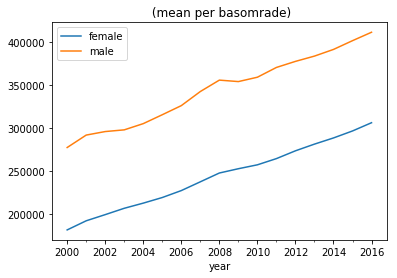

In [10]:
plotcombined(female, 'female')
plotcombined(male, 'male')

### Total

In [9]:
medel = glob.glob('../indata/supermappen/*MedelBas*.csv')

In [10]:
concept = 'mean_income_aged_gt_20'

In [11]:
def readMedel(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',')
    df['year'] = pd.to_datetime(getYear(file))
    df = df.rename(columns={
        'basomrade': 'BASKOD2010',
        'Medel': 'value'
    })
    df['year'] = df['year'].apply(lambda t: t.year)
    return df

In [12]:
df = pd.concat(list(map(readMedel, medel)))

In [13]:
df = baskod2010tobasomrade(df)

In [14]:
df = df[['basomrade', 'year', 'value']]

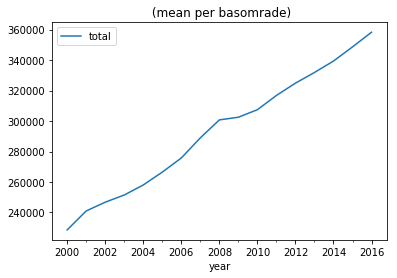

In [25]:
combined = appendNewDatapoints(concept, df)
plotcombined(combined, 'total')

In [26]:
combined[combined['basomrade'] == '3220211_alvnas']

,basomrade,year,value
2156,3220211_alvnas,2000,347855.20
2157,3220211_alvnas,2001,364652.38
2158,3220211_alvnas,2002,371000.51
2159,3220211_alvnas,2003,365859.34
2160,3220211_alvnas,2004,385406.92
2161,3220211_alvnas,2005,412860.20
2162,3220211_alvnas,2006,430198.43
2163,3220211_alvnas,2007,465523.18
2164,3220211_alvnas,2008,490287.54
2165,3220211_alvnas,2009,482350.01


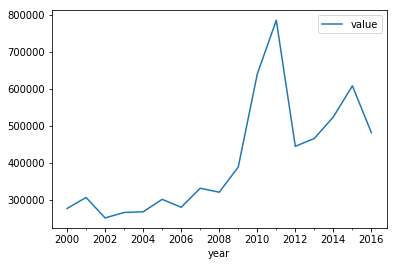

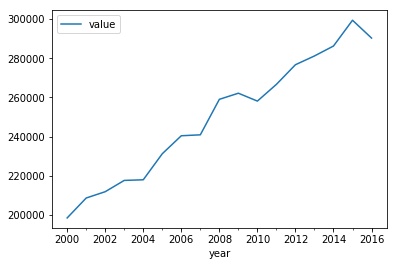

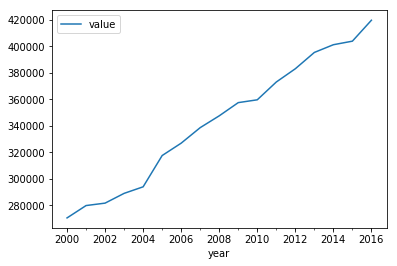

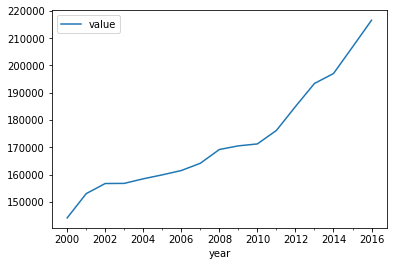

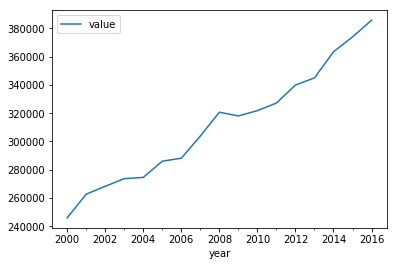

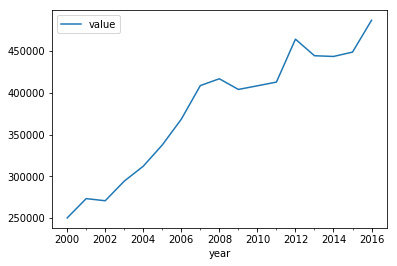

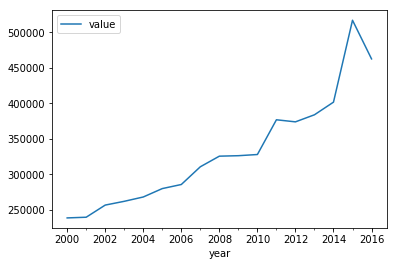

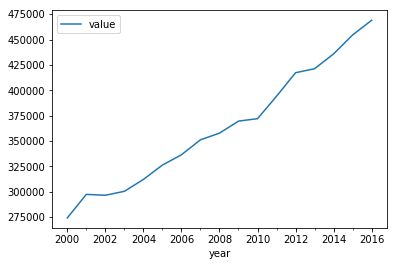

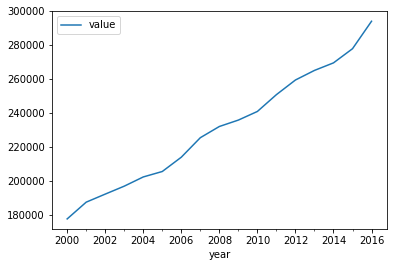

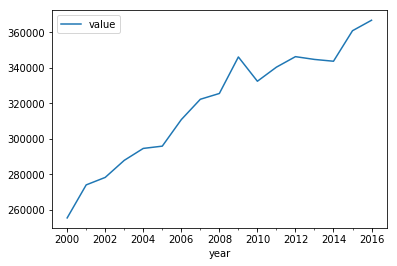

In [43]:
# combined['year'] = pd.to_datetime(combined['year'].astype('str'))
# combined = combined.set_index('year')
# combined[combined['basomrade'] == '5610500_gustavsbergs_glesbygd_gustavsbergs_glesbygd_v'].plot()

combined[combined['basomrade'] == '1010310_norrlandsgatan'].plot()
combined[combined['basomrade'] == '3911760_midgard'].plot()
combined[combined['basomrade'] == '3610931_tegelhagen'].plot()
combined[combined['basomrade'] == '3612710_bagarby'].plot()
combined[combined['basomrade'] == '1010140_stortorget'].plot()
combined[combined['basomrade'] == '1110250_elverket'].plot()
combined[combined['basomrade'] == '1120150_skandiahuset'].plot()
combined[combined['basomrade'] == '1130150_polstjarnan'].plot()
combined[combined['basomrade'] == '2160520_gubbangstorget'].plot()
combined[combined['basomrade'] == '3610650_ovriga_edsberg'].plot()

#     (combined.groupby('year').mean()[name]).plot(legend=True, title='{title} (mean per basomrade)'.format(title=title))